### Author: [Manuel Solano](https://www.manuelsolan-o.com/)

### Date: 23/06/2024

## DataSet

In [10]:
import pandas as pd

data = {
    "y": [1.4, 1.9, 3.2],
    "x": [0.5, 2.3, 2.9]
}

df = pd.DataFrame(data)

df

,y,x
0,1.4,0.5
1,1.9,2.3
2,3.2,2.9


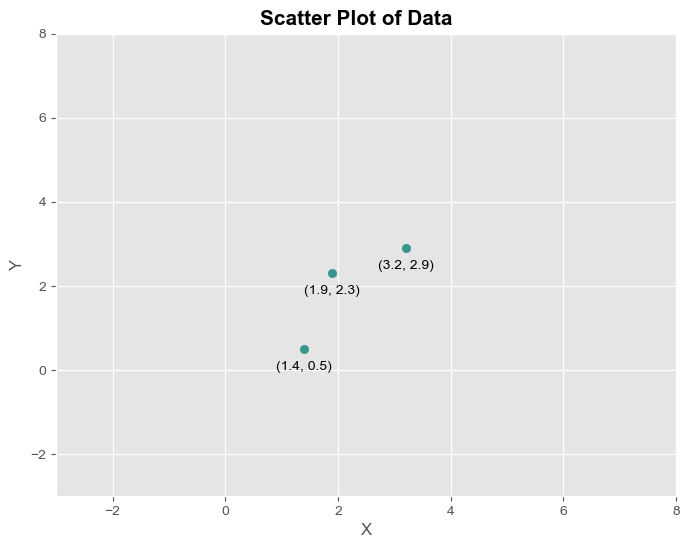

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.style.use('ggplot')

plt.figure(figsize=(8, 6))

plt.scatter(df['y'], df['x'], color='#35978f')

for i, row in df.iterrows():
    plt.annotate(f'({row["y"]}, {row["x"]})', (row['y'], row['x']), textcoords="offset points", xytext=(0,-15), ha='center')
    
#plt.title('Scatter Plot of Data')
    plt.suptitle(
    'Scatter Plot of Data',
    color='black',
    fontsize=15,
    #loc='center',
    fontweight='bold',
    style='normal',
    family='Arial',
    y=0.92)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-3, 8)
plt.ylim(-3, 8)

plt.savefig(f'media/scatter.png', dpi=300)

# Show plot
plt.show()

## Training Function (Model) $y = \vec{w_0} +\vec{w_1} \cdot \vec{x_1}$

## Loss Function: $\text{Sum of Squared Residuals}$

$$\text{Sum of Squared Residuals (SSR)} = (1.4 - w_0 + w_1^1 \cdot x^1_1)^2 + (1.9 - w_0 + w_1^2 \cdot x^2_1)^2 + (3.2 - w_0 + w_1^3 \cdot x^3_1)^2$$

## Gradient Descent: One Variable $w_0$

$$
\frac{\partial L(\vec{w}^{i})}{\partial w_0} = -2(1.4 - w_0 + 0.64 \cdot 0.5) -2(1.9 - w_0 + 0.64 \cdot 2.3) -2(1.4 - w_0 + 0.64 \cdot 2.9)
$$

In [21]:
from sympy import *

w0 = symbols('w0')
w1 = 0.64

# Define Loss Function
L = (1.4 - (w0 + w1 * 0.5))**2 + (1.9 - (w0 + w1 * 2.3))**2 + (3.2 - (w0 + w1 * 2.9))**2

# Calculate the derivative of L
dw0_L = diff(L)
print(f'The derivative of L: {dw0_L}')

The derivative of L: 6.0*w0 - 5.704


### $1^{st}$ Iteration 

In [22]:
w_i = 0
learning_rate = 0.1
slope = dw0_L.subs(w0,w_i) # Substitue the derivative in the w_i will give us the slope at that point

step_size = learning_rate * slope

updated_w_1 = w_i - step_size

updated_w_1

0.570400000000000

In [23]:
step_size

-0.570400000000000

### $2^{nd}$ Iteration 

In [24]:
w_i = 0.5704
learning_rate = 0.1
slope = dw0_L.subs(w0,w_i) # Substitue the derivative in the w_i will give us the slope at that point

step_size = learning_rate * slope

updated_w_1 = w_i - step_size

updated_w_1

0.798560000000000

### $3^{rd}$ Iteration 

In [25]:
w_i = 0.79856
learning_rate = 0.1
slope = dw0_L.subs(w0,w_i) # Substitue the derivative in the w_i will give us the slope at that point

step_size = learning_rate * slope

updated_w_1 = w_i - step_size

updated_w_1

0.889824000000000

### Automatizated Algorithm

In [26]:
w_i = 0
learning_rate = 0.1
i = 1
step_size = 1

while abs(step_size) >= 0.001 and i != 1000:
    slope = dw0_L.subs(w0,w_i) # Substitue the derivative in the w_i will give us the slope at that point
    step_size = learning_rate * slope
    updated_w_1 = w_i - step_size
    w_i = updated_w_1
    
    print(f'''Iteration: {i} 
    StepSize: {step_size}
    New Intercept: {updated_w_1}
    ''')
    
    i += 1

Iteration: 1 
    StepSize: -0.570400000000000
    New Intercept: 0.570400000000000
    
Iteration: 2 
    StepSize: -0.228160000000000
    New Intercept: 0.798560000000000
    
Iteration: 3 
    StepSize: -0.0912640000000000
    New Intercept: 0.889824000000000
    
Iteration: 4 
    StepSize: -0.0365055999999999
    New Intercept: 0.926329600000000
    
Iteration: 5 
    StepSize: -0.0146022400000000
    New Intercept: 0.940931840000000
    
Iteration: 6 
    StepSize: -0.00584089600000004
    New Intercept: 0.946772736000000
    
Iteration: 7 
    StepSize: -0.00233635840000002
    New Intercept: 0.949109094400000
    
Iteration: 8 
    StepSize: -0.000934543360000006
    New Intercept: 0.950043637760000
    


In [27]:
w_i = 0
learning_rate = 0.1
i = 1
step_size = 1

# Values for plot

slopes = []
init_w0 = []
updated_w0 = []

while abs(step_size) >= 0.001 and i != 1000:
    slope = dw0_L.subs(w0,w_i) # Substitue the derivative in the w_i will give us the slope at that point
    step_size = learning_rate * slope
    slopes.append(slope)
    init_w0.append(w_i)
    updated_w_1 = w_i - step_size
    updated_w0.append(updated_w_1)
    w_i = updated_w_1

In [28]:
slopes

[-5.70400000000000,
 -2.28160000000000,
 -0.912640000000000,
 -0.365055999999999,
 -0.146022400000000,
 -0.0584089600000004,
 -0.0233635840000002,
 -0.00934543360000006]

In [29]:
len(slopes)

8

In [30]:
init_w0

[0,
 0.570400000000000,
 0.798560000000000,
 0.889824000000000,
 0.926329600000000,
 0.940931840000000,
 0.946772736000000,
 0.949109094400000]

In [35]:
updated_w0

[0.570400000000000,
 0.798560000000000,
 0.889824000000000,
 0.926329600000000,
 0.940931840000000,
 0.946772736000000,
 0.949109094400000,
 0.950043637760000]

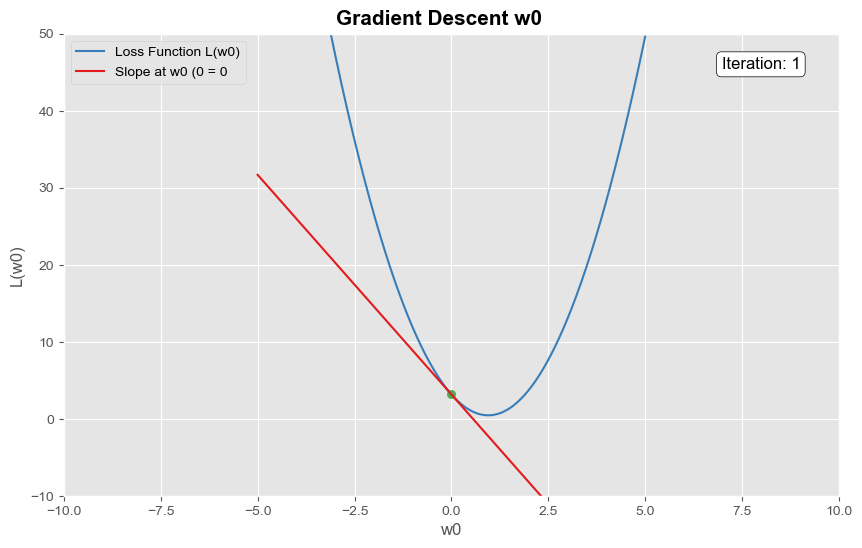

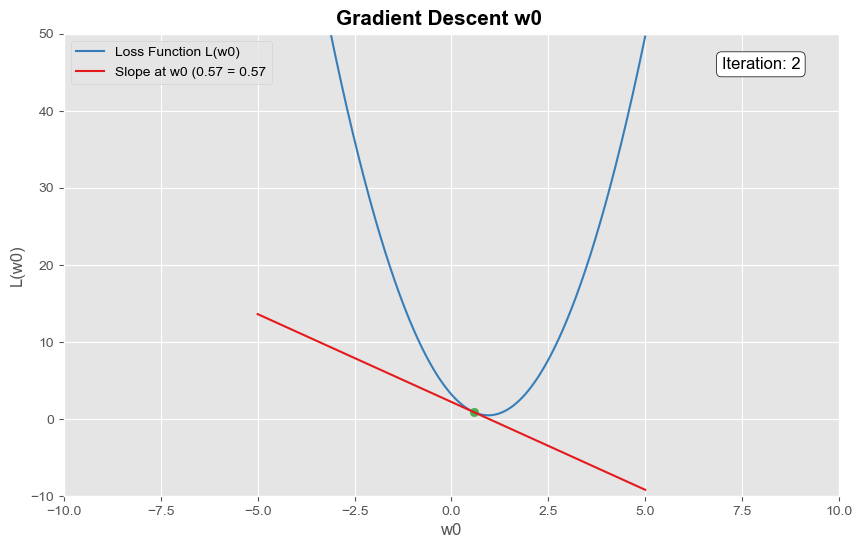

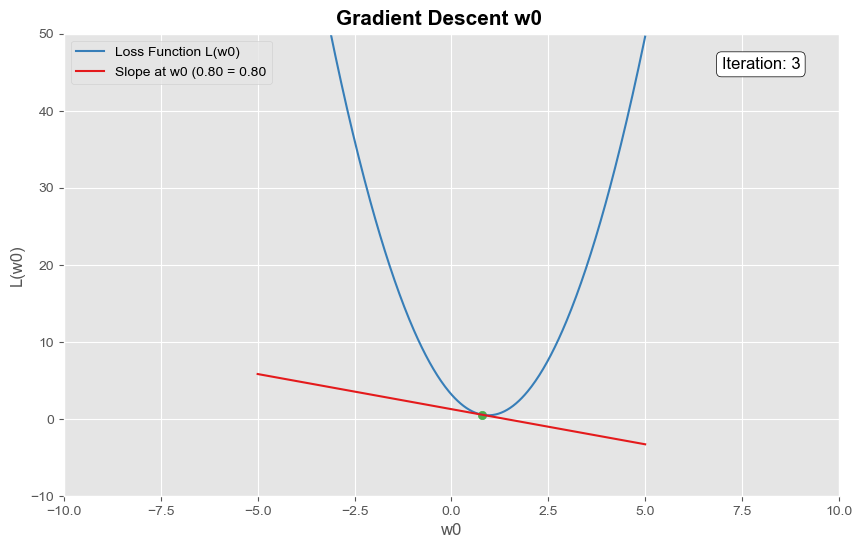

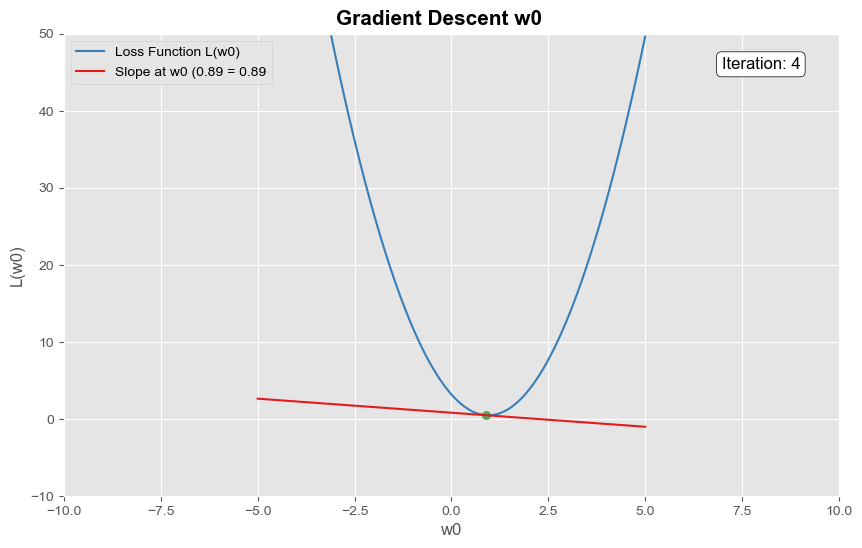

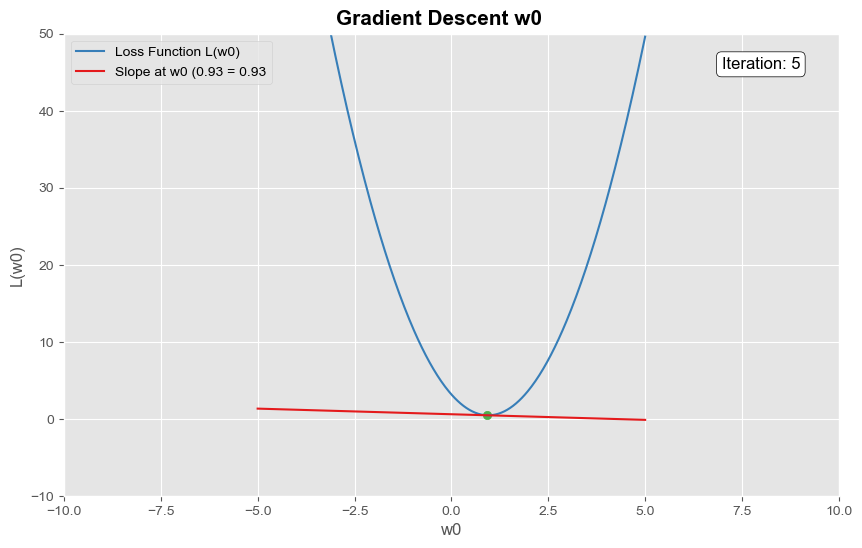

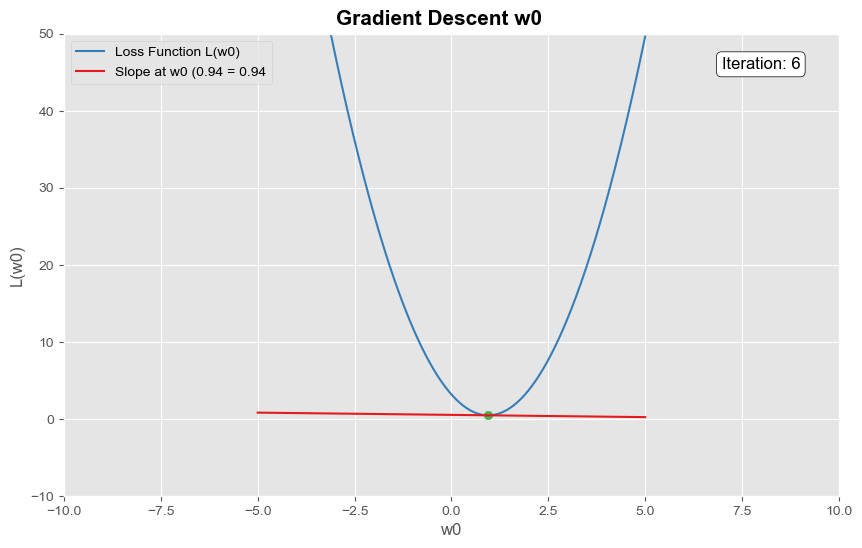

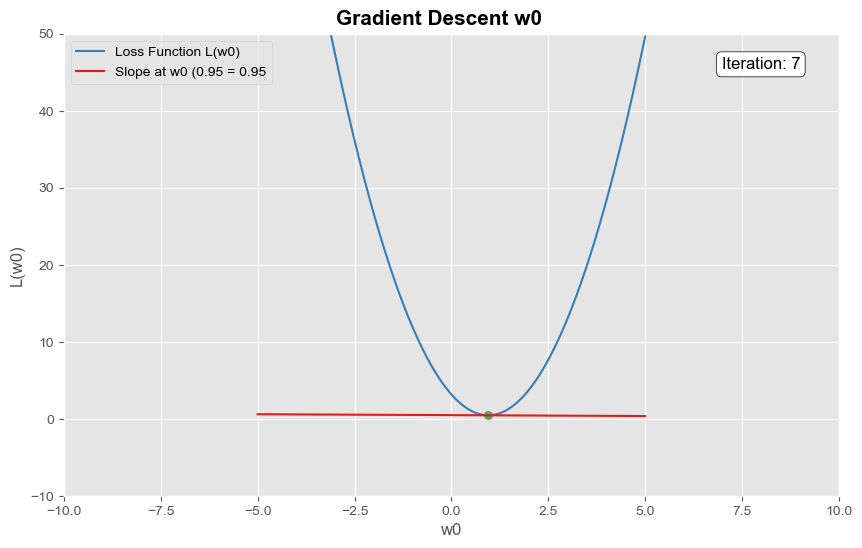

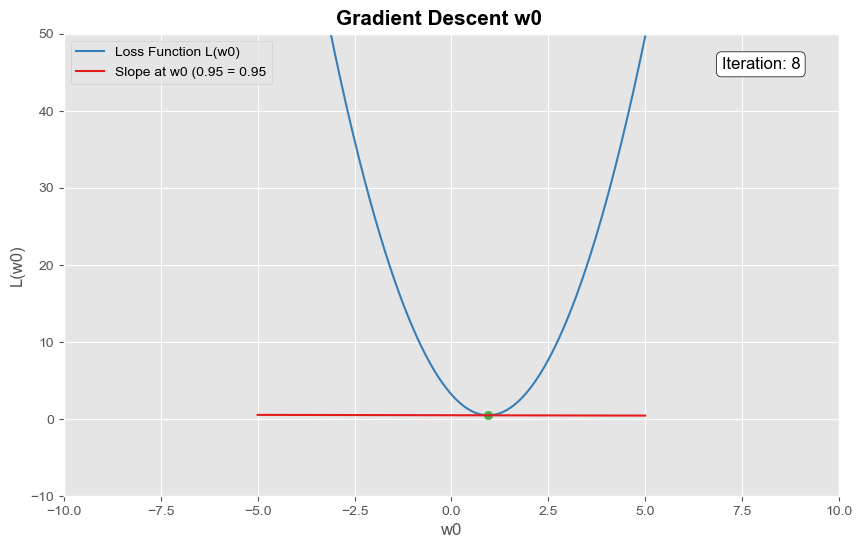

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def L_function(w0):
    return (1.4 - (w0 + w1 * 0.5))**2 + (1.9 - (w0 + w1 * 2.3))**2 + (3.2 - (w0 + w1 * 2.9))**2

def tangent_function(w0, slope, intercept):
    return slope * w0 + intercept

plt.rcParams['font.family'] = 'Arial'
plt.style.use('ggplot')

for i in range(len(slopes)):
    slope_at_0 = slopes[i]
    intercept_at_0 = L_function(init_w0[i]) - slope_at_0 * init_w0[i]

    w0_vals = np.linspace(-5, 5, 400)

    L_vals = [L_function(w) for w in w0_vals]
    tangent_vals = [tangent_function(w, slope_at_0, intercept_at_0) for w in w0_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(w0_vals, L_vals, label='Loss Function L(w0)', color = '#377eb8')
    plt.plot(w0_vals, tangent_vals, label=f'Slope at w0 ({round(init_w0[i],2)} = {round(init_w0[i],2)}', color = '#e41a1c')
    plt.scatter(init_w0[i], L_function(init_w0[i]), color='#4daf4a')  # Mark the point at the initial w0

    plt.xlim(-10, 10)
    plt.ylim(-10, 50)

    #plt.title(f'Loss Function and Tangent Line at w0 = {init_w0[i]}')

    plt.suptitle(
    'Gradient Descent w0',
    color='black',
    fontsize=15,
    #loc='center',
    fontweight='bold',
    style='normal',
    family='Arial',
    y=0.92)

    plt.annotate(f'Iteration: {i+1}', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12,
                 horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

    plt.xlabel('w0')
    plt.ylabel('L(w0)')
    plt.legend(loc = 'upper left')
    plt.grid(True)
    
    
    #plt.savefig(f'media/grad_descent_w0_{i+1}.png', dpi=300)
    
    plt.show()


### Regression Line

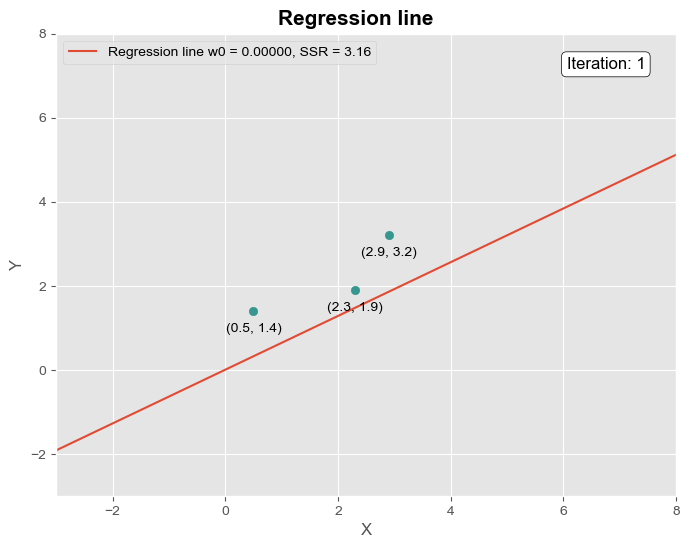

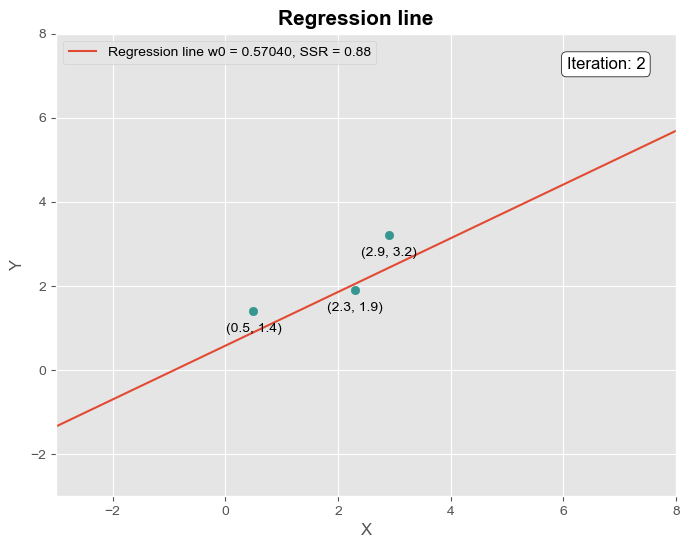

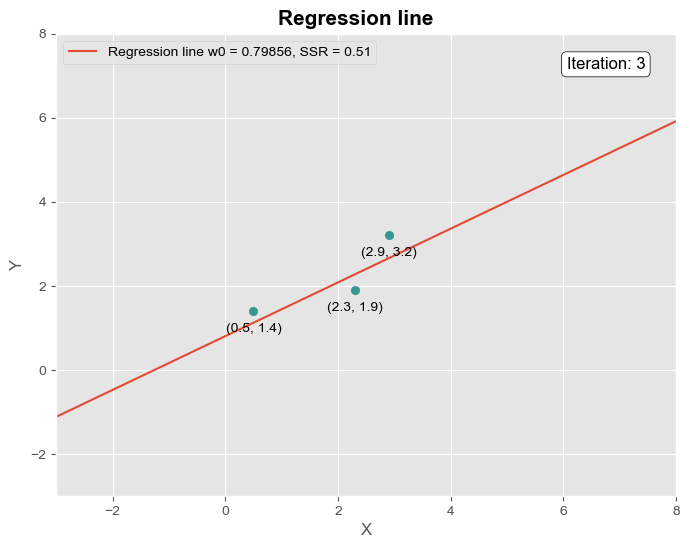

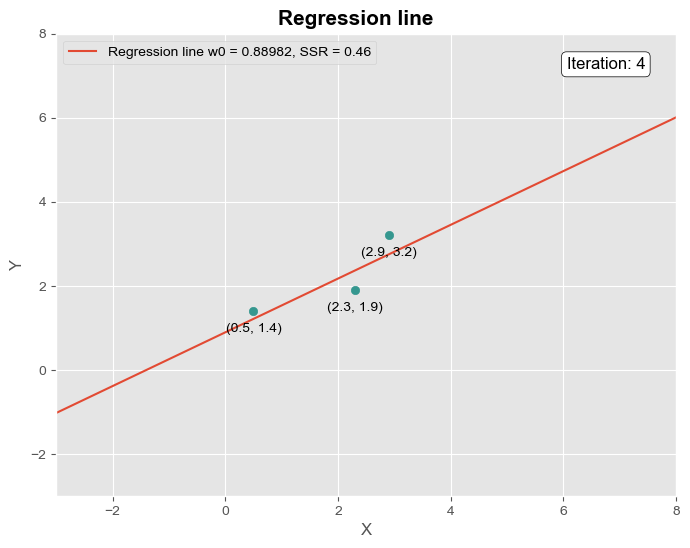

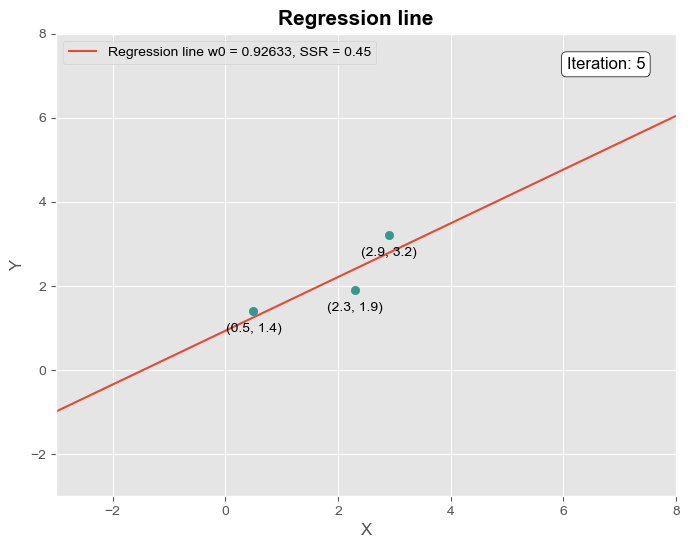

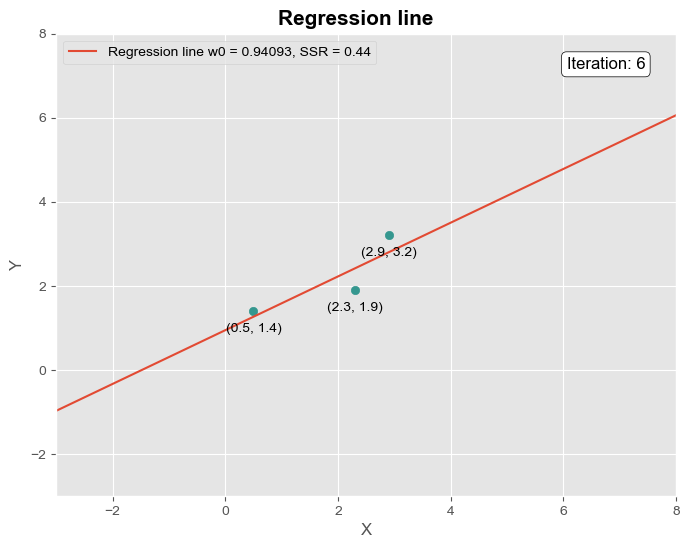

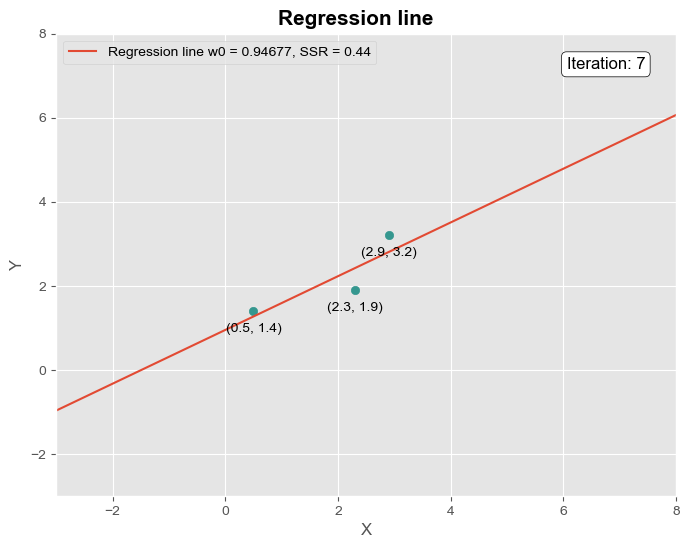

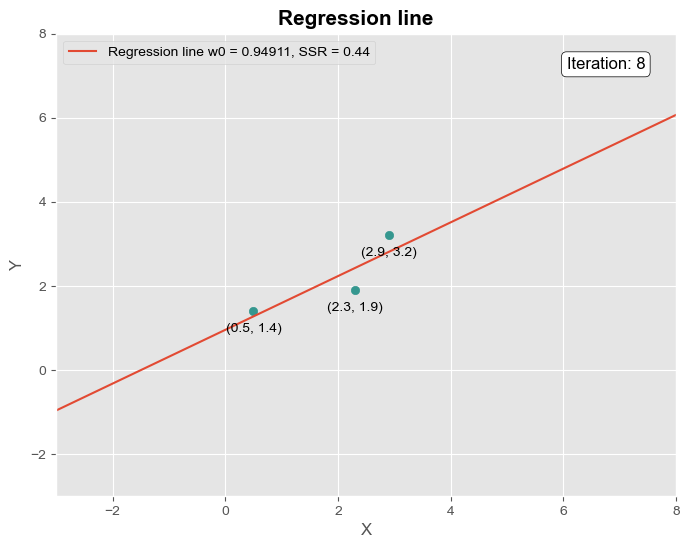

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the data
data = {
    "y": [1.4, 1.9, 3.2],
    "x": [0.5, 2.3, 2.9]
}

df = pd.DataFrame(data)

def regression_line(w0, w1, x):
    return w0 + w1 * x

def ssr(y_true, w0, w1, x1):
    y_pred = w0 + w1 * x1
    residuals = (y_true - y_pred)**2
    return np.sum(residuals)

# Define the initial values for w0
init_w0 = [0, 0.5704, 0.79856, 0.889824, 0.9263296, 0.94093184, 0.946772736, 0.9491090944]

# w1 constant value
w1 = 0.64

# Select the 'x' and 'y' columns
x1 = df.iloc[:, 1].values
y_true = df.iloc[:, 0].values

# Plotting
plt.rcParams['font.family'] = 'Arial'
plt.style.use('ggplot')

for j, w0 in enumerate(init_w0):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['x'], df['y'], color='#35978f')
    
    # Add annotations to the points
    for i, row in df.iterrows():
        plt.annotate(f'({row["x"]}, {row["y"]})', (row['x'], row['y']), textcoords="offset points", xytext=(0, -15), ha='center')

    # Define the range for x values
    x_vals = np.linspace(-3, 8, 400)
    y_vals = regression_line(w0, w1, x_vals)
    ssr_value = ssr(y_true, w0, w1, x1)
    plt.plot(x_vals, y_vals, label=f'''Regression line w0 = {w0:.5f}, SSR = {ssr_value:.2f}''')

    # Add title and labels
    plt.suptitle(
        'Regression line',
        color='black',
        fontsize=15,
        fontweight='bold',
        style='normal',
        family='Arial',
        y=0.92
    )
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(-3, 8)
    plt.ylim(-3, 8)
    plt.legend(loc='upper left')

    plt.annotate(f'Iteration: {j+1}', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12,
                 horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

    # Save the plot
    plt.savefig(f'media/regression_{j}.png', dpi=300)

    # Show plot
    plt.show()



### Gradient Descent $w_0$ & $w_1$

### Gradient Descent

In [43]:
from sympy import *

w0 = symbols('w0')
w1 = symbols('w1')

# Define Loss Function
L = (1.4 - (w0 + w1 * 0.5))**2 + (1.9 - (w0 + w1 * 2.3))**2 + (3.2 - (w0 + w1 * 2.9))**2

# Calculate the derivative of L
dw0_L = diff(L,w0)
dw1_L = diff(L,w1)
print(f'The derivative of L with respect of w0: {dw0_L}')
print(f'The derivative of L with respect of w1: {dw1_L}')

The derivative of L with respect of w0: 6.0*w0 + 11.4*w1 - 13.0
The derivative of L with respect of w1: 11.4*w0 + 27.9*w1 - 28.7


In [44]:
w0_i = 0
w1_i = 1
learning_rate = 0.1
i = 1
step_size_w0 = 1
step_size_w1 = 1

while abs(step_size_w0) >= 0.001 or abs(step_size_w1) >= 0.001 and i != 1000:
    slope_w0 = dw0_L.subs({w0: w0_i, w1: w1_i}) # Substitue the derivative in the w_i will give us the slope at that point
    step_size_w0 = learning_rate * slope_w0
    updated_w_0 = w0_i - step_size_w0
    w0_i = updated_w_0
    
    slope_w1 = dw1_L.subs({w0: w0_i, w1: w1_i}) # Substitue the derivative in the w_i will give us the slope at that point
    step_size_w1 = learning_rate * slope_w1
    updated_w_1 = w1_i - step_size_w1
    w1_i = updated_w_1
    
    print(f'''Iteration: {i} 
    StepSize_w0: {step_size_w0}
    New w0: {updated_w_0}
    
    StepSize_w1: {step_size_w1}
    New w1: {updated_w_1}
    ''')
    i += 1

Iteration: 1 
    StepSize_w0: -0.160000000000000
    New w0: 0.160000000000000
    
    StepSize_w1: 0.102400000000000
    New w1: 0.897600000000000
    
Iteration: 2 
    StepSize_w0: -0.180736000000000
    New w0: 0.340736000000000
    
    StepSize_w1: 0.0227430400000003
    New w1: 0.874856960000000
    
Iteration: 3 
    StepSize_w0: -0.0982214656000004
    New w0: 0.438957465600001
    
    StepSize_w1: 0.0712624291839994
    New w1: 0.803594530816000
    
Iteration: 4 
    StepSize_w0: -0.120527755509759
    New w0: 0.559485221109760
    
    StepSize_w1: 0.00984189304176688
    New w1: 0.793752637774233
    
Iteration: 5 
    StepSize_w0: -0.0594308602715181
    New w0: 0.618916081381278
    
    StepSize_w1: 0.0501341921647683
    New w1: 0.743618445609465
    
Iteration: 6 
    StepSize_w0: -0.0809253231764430
    New w0: 0.699841404557721
    
    StepSize_w1: 0.00251466444620974
    New w1: 0.741103781163255
    
Iteration: 7 
    StepSize_w0: -0.0352368467392562
    New w

In [45]:
# Values for plot
w0_i = 0
w1_i = 1
learning_rate = 0.1
i = 1
step_size_w0 = 1
step_size_w1 = 1

slopes_w0 = []
init_w0 = []
updated_w0 = []

slopes_w1 = []
init_w1 = []
updated_w1 = []

while abs(step_size_w0) >= 0.001 or abs(step_size_w1) >= 0.001 and i != 1000:
    slope_w0 = dw0_L.subs({w0: w0_i, w1: w1_i}) # Substitue the derivative in the w_i will give us the slope at that point
    step_size_w0 = learning_rate * slope_w0
    slopes_w0.append(slope_w0)
    init_w0.append(w0_i)
    updated_w_0 = w0_i - step_size_w0
    updated_w0.append(updated_w_0)
    w0_i = updated_w_0
    
    slope_w1 = dw1_L.subs({w0: w0_i, w1: w1_i}) # Substitue the derivative in the w_i will give us the slope at that point
    step_size_w1 = learning_rate * slope_w1
    slopes_w1.append(slope_w1)
    init_w1.append(w1_i)
    updated_w_1 = w1_i - step_size_w1
    updated_w1.append(updated_w_1)
    w1_i = updated_w_1
    

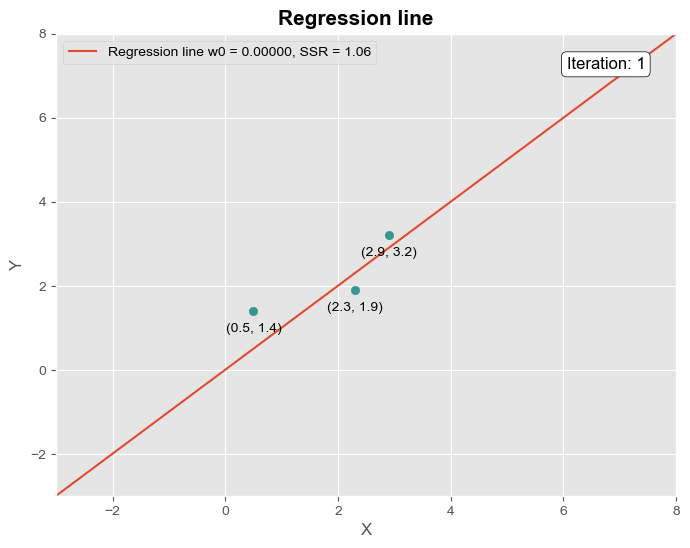

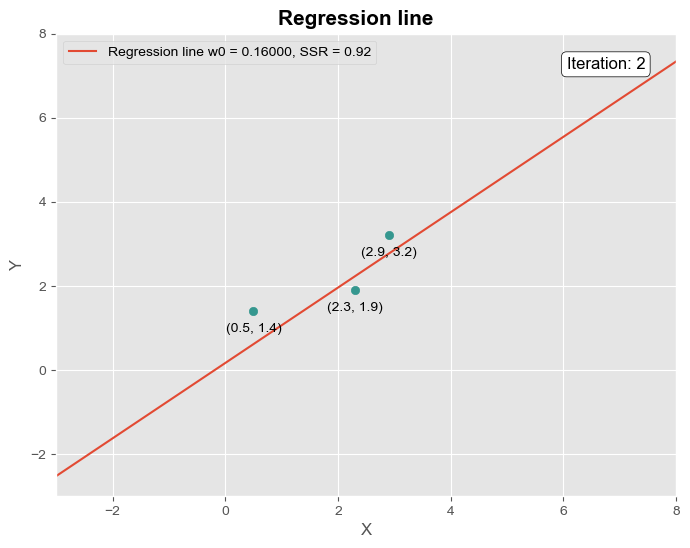

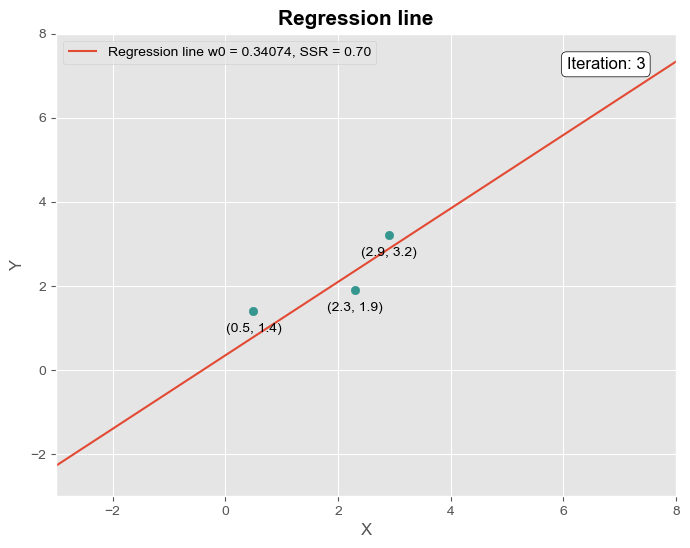

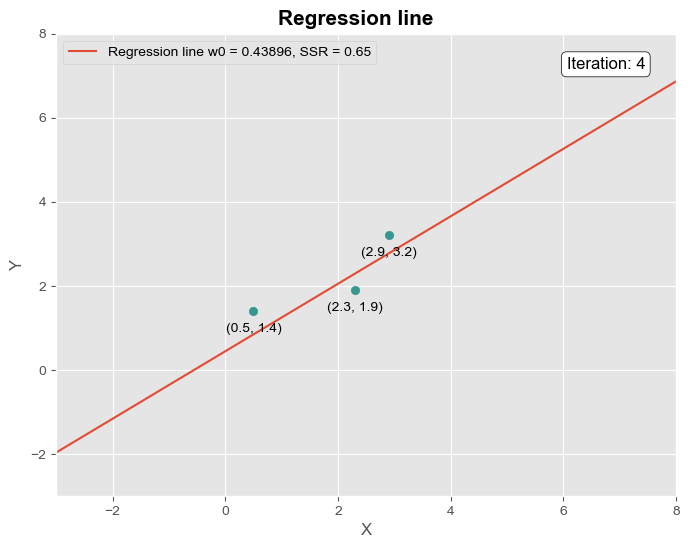

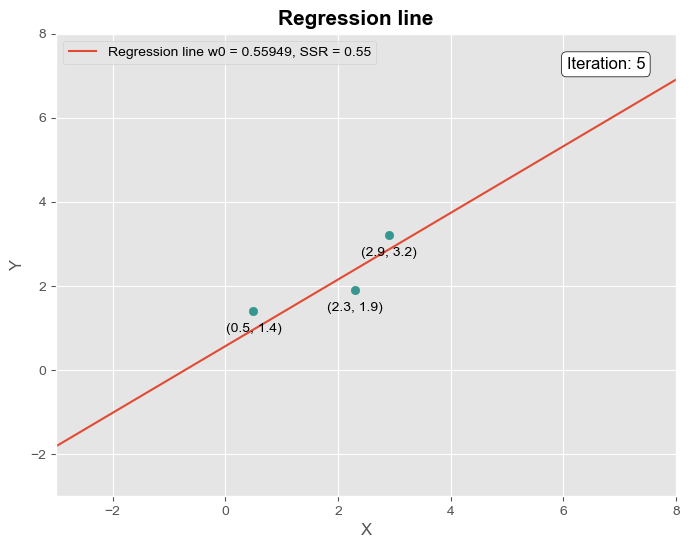

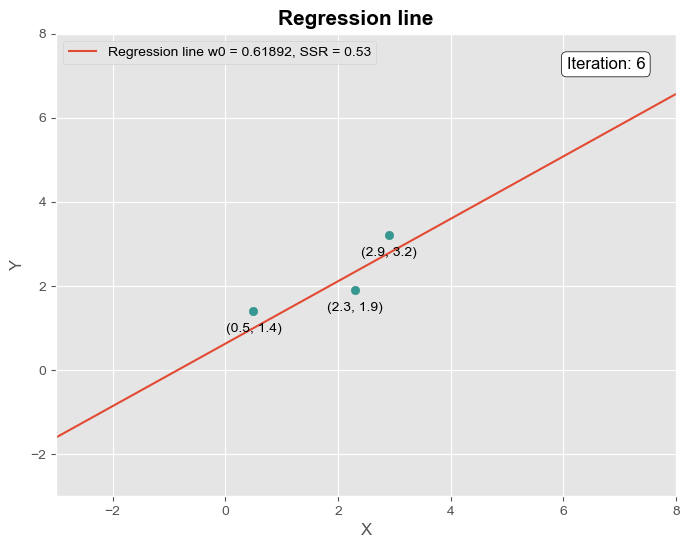

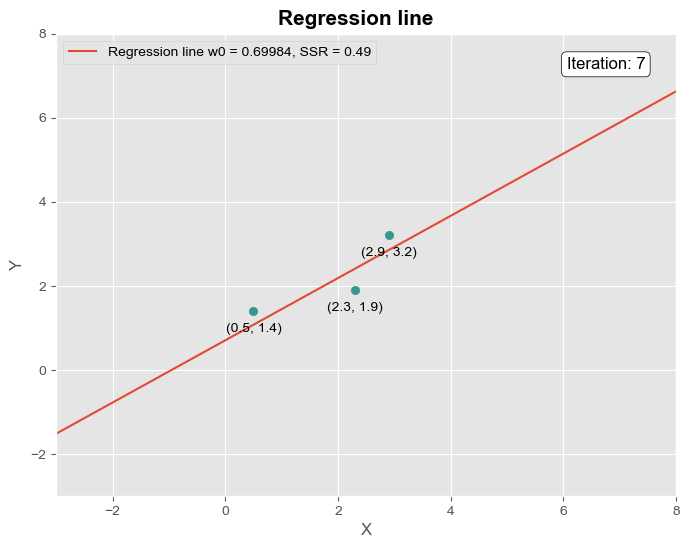

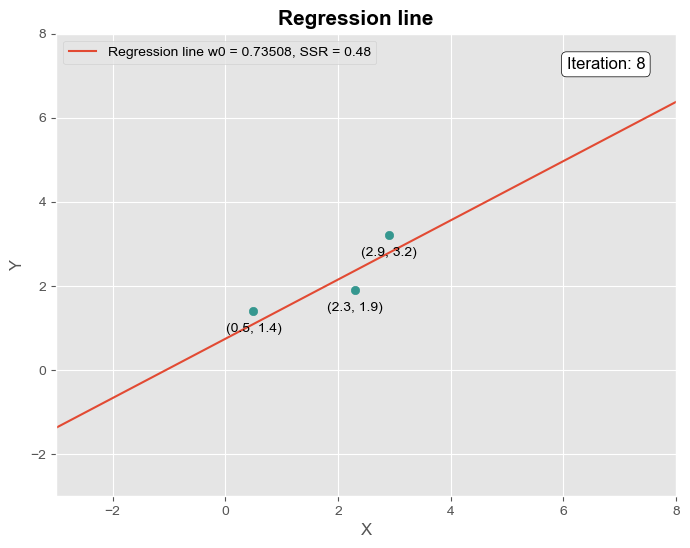

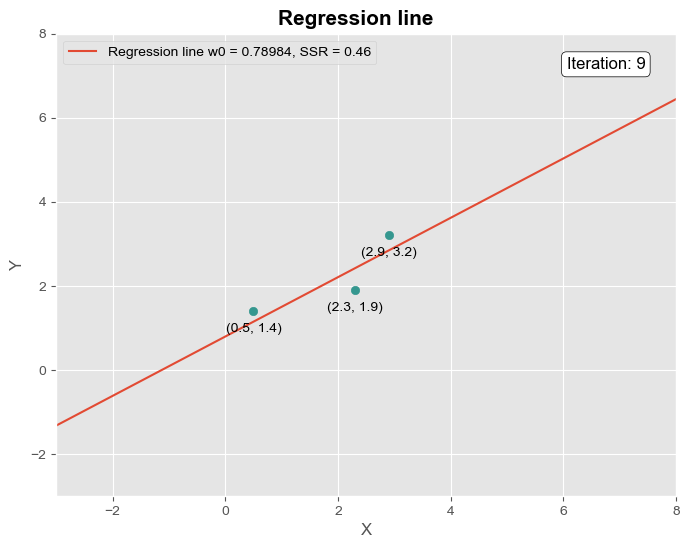

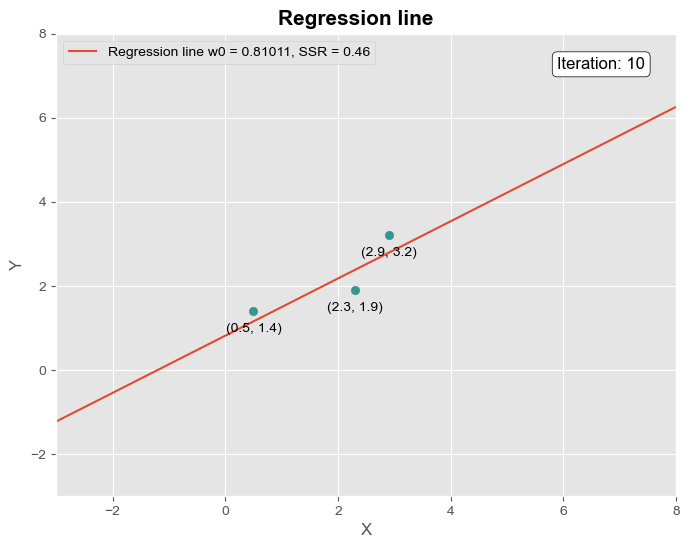

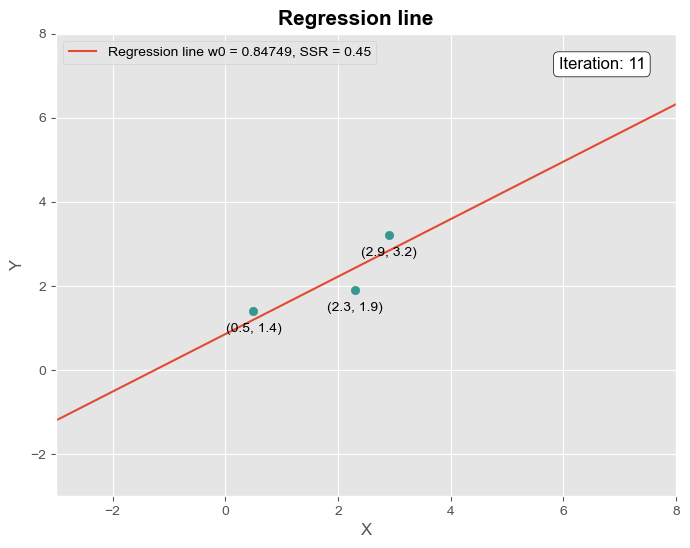

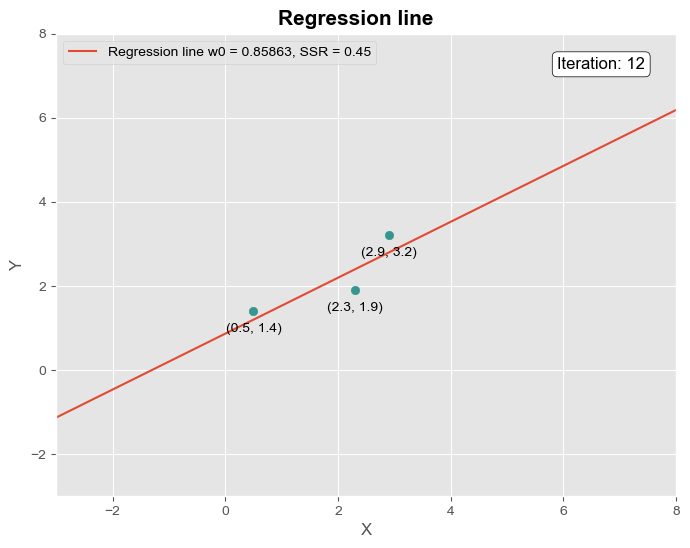

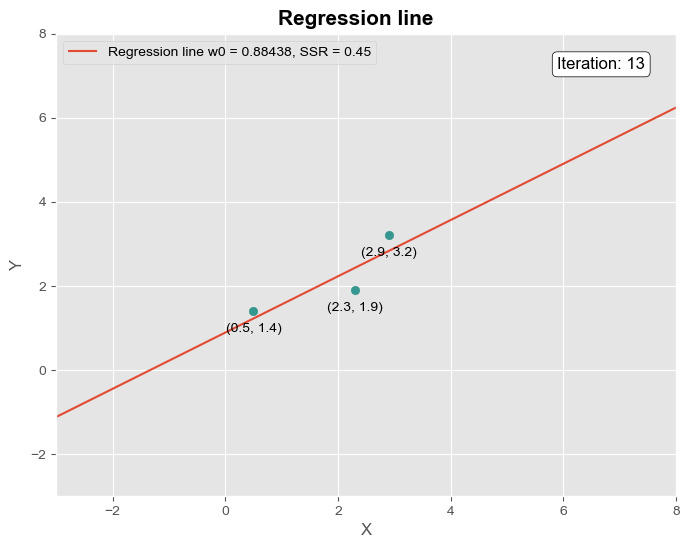

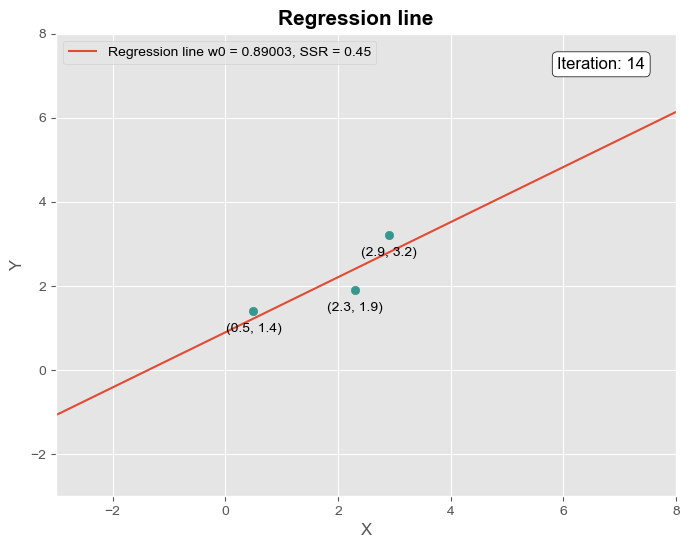

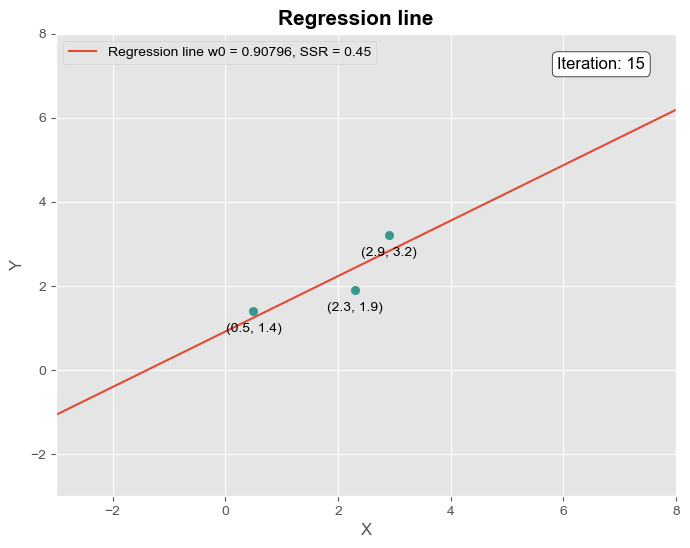

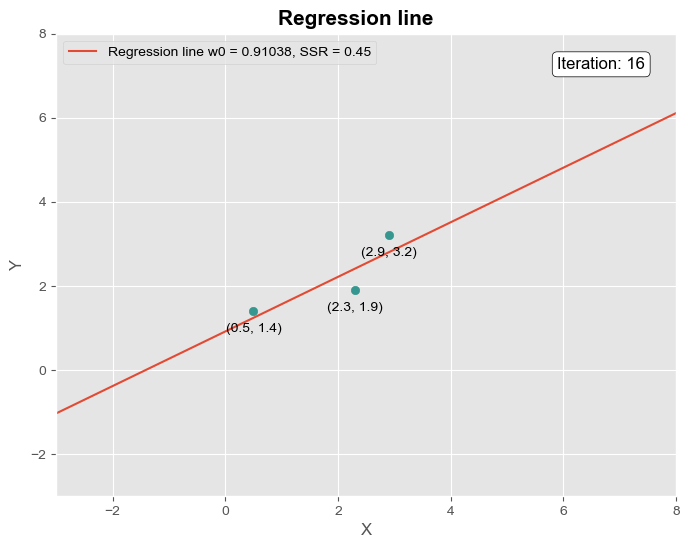

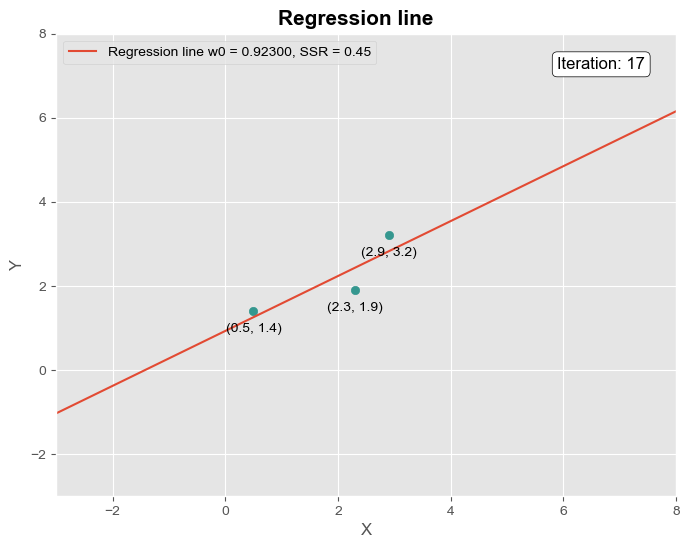

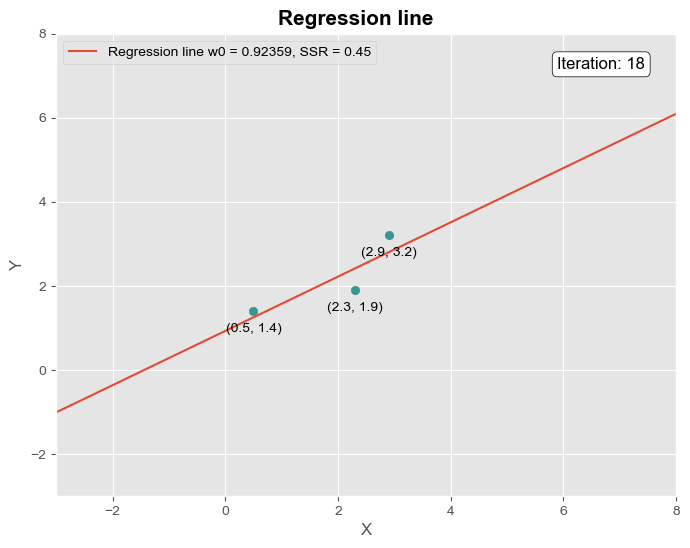

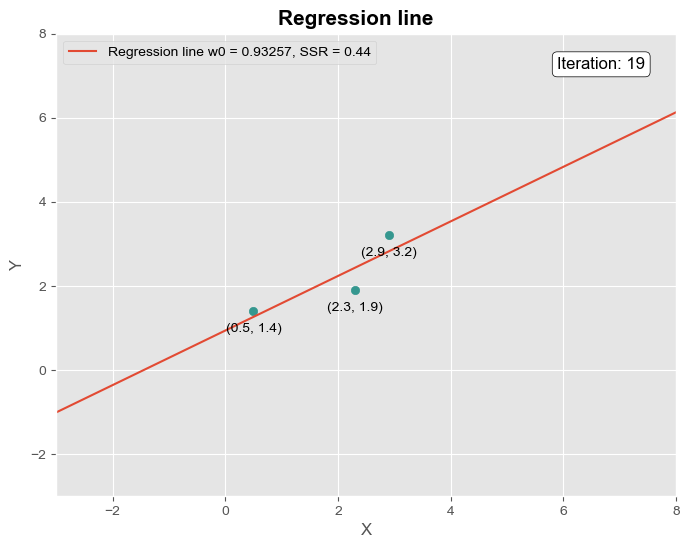

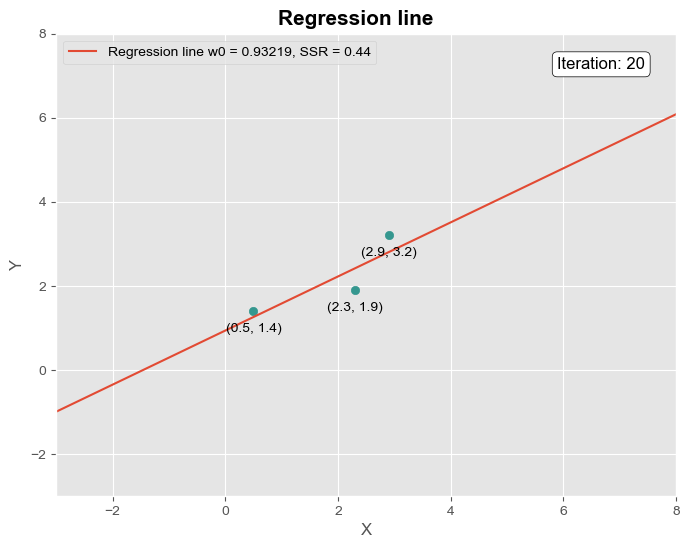

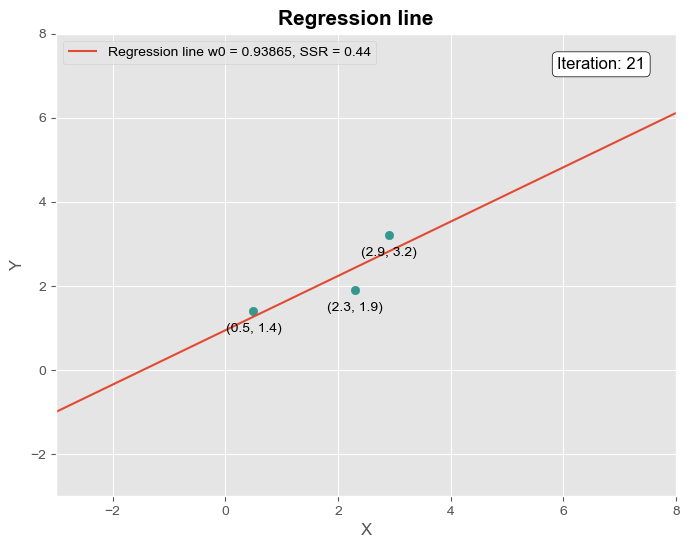

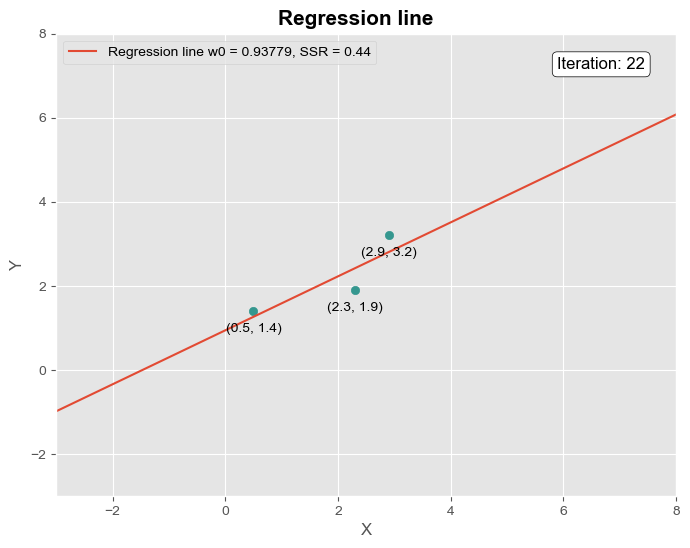

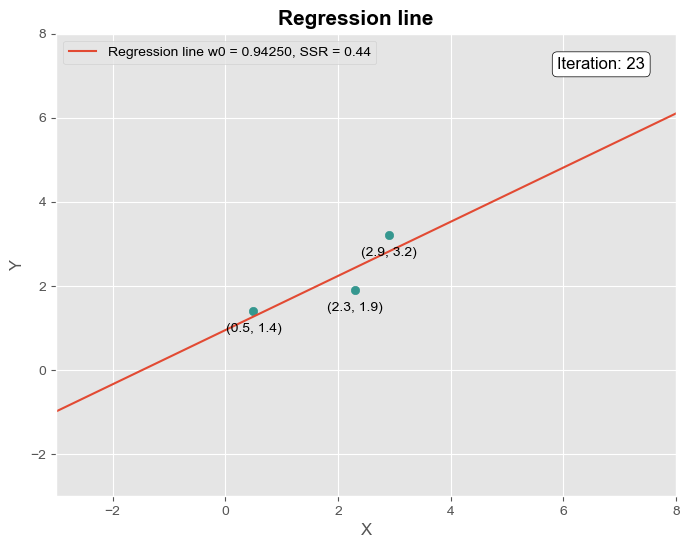

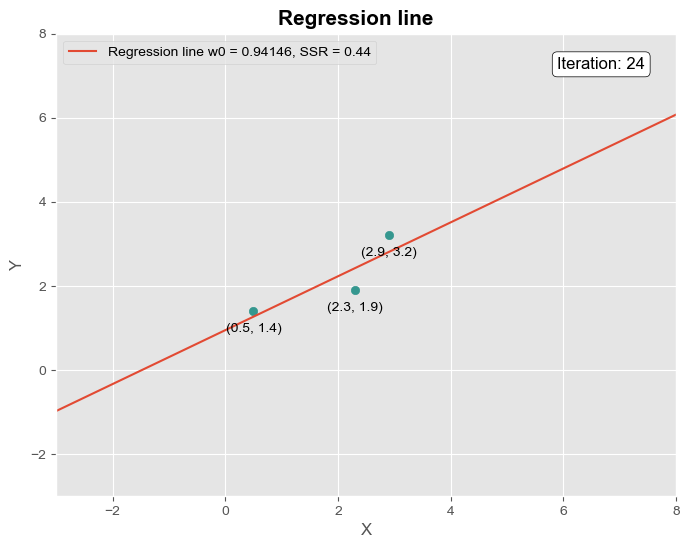

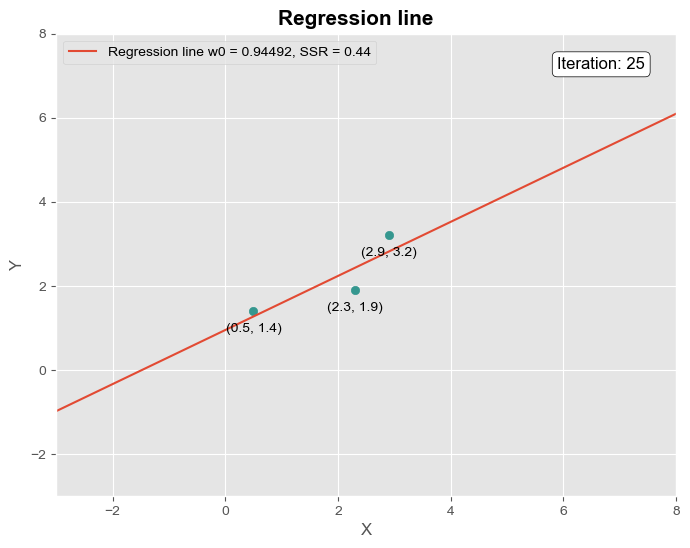

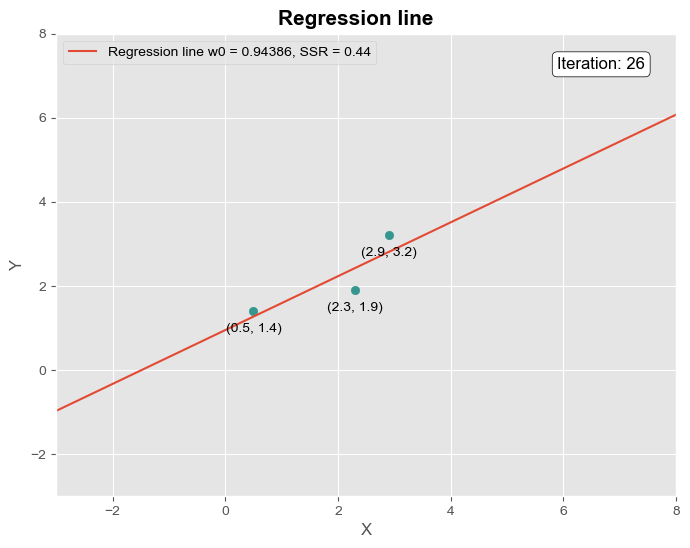

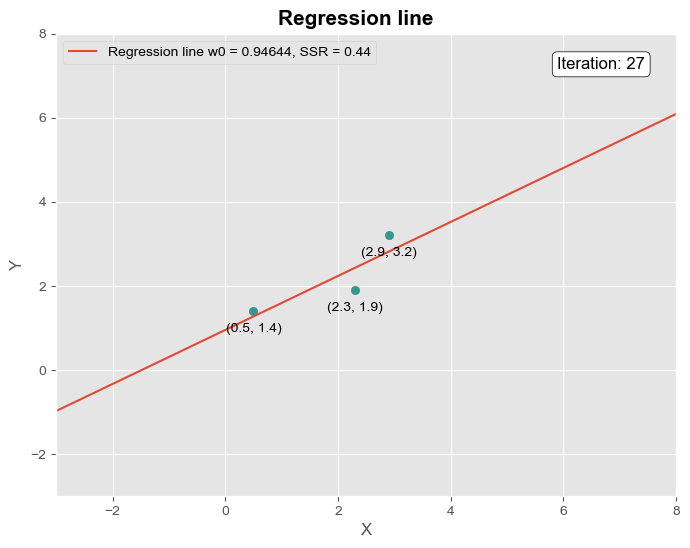

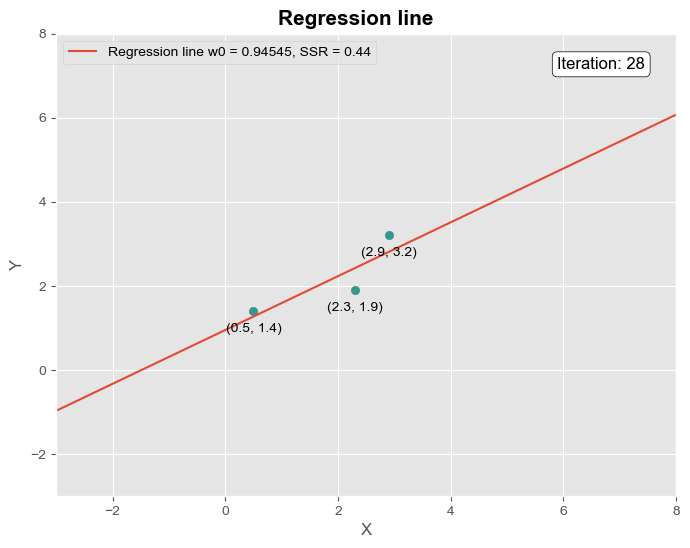

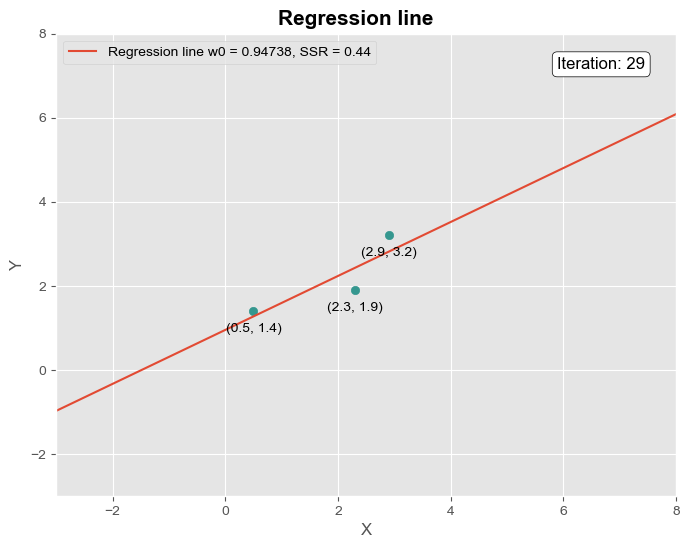

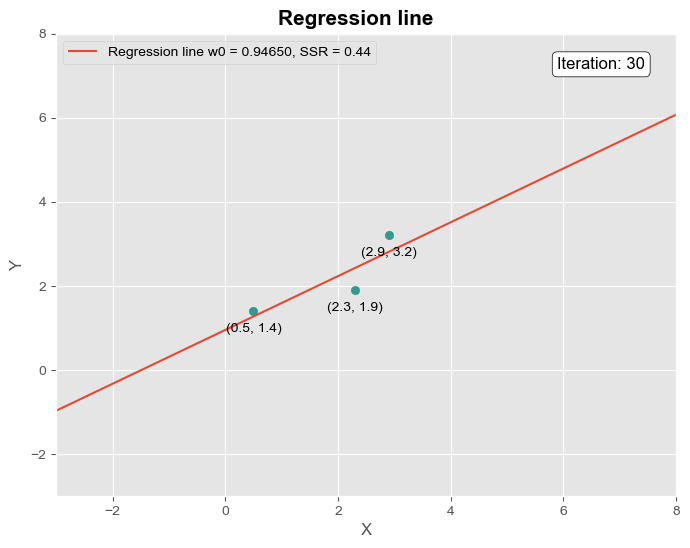

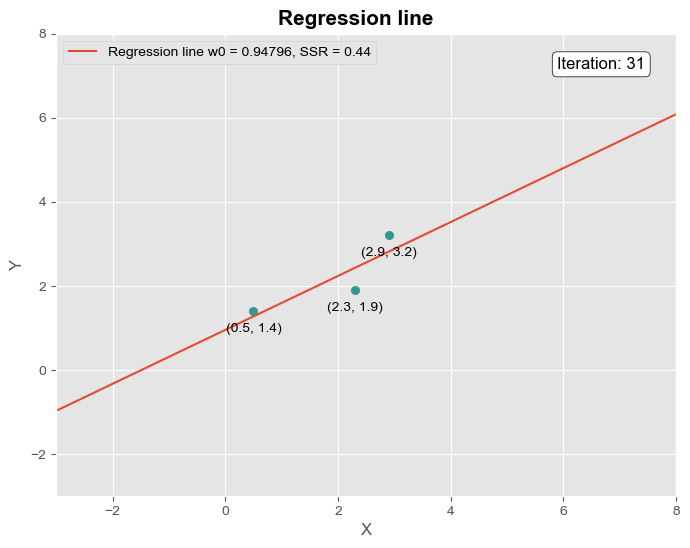

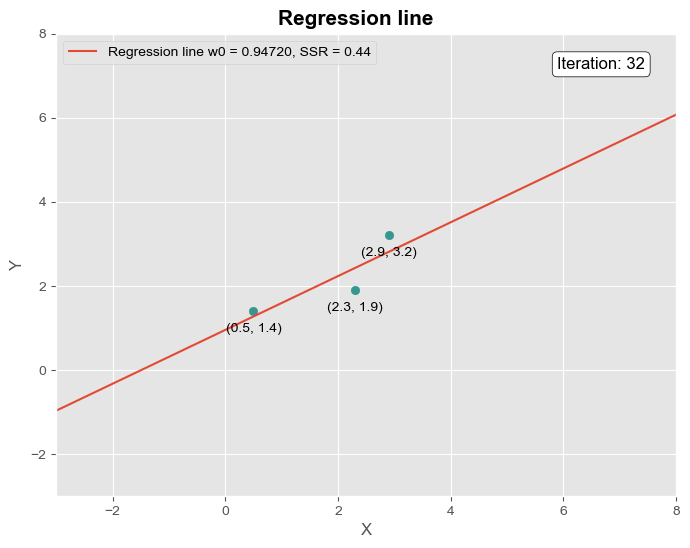

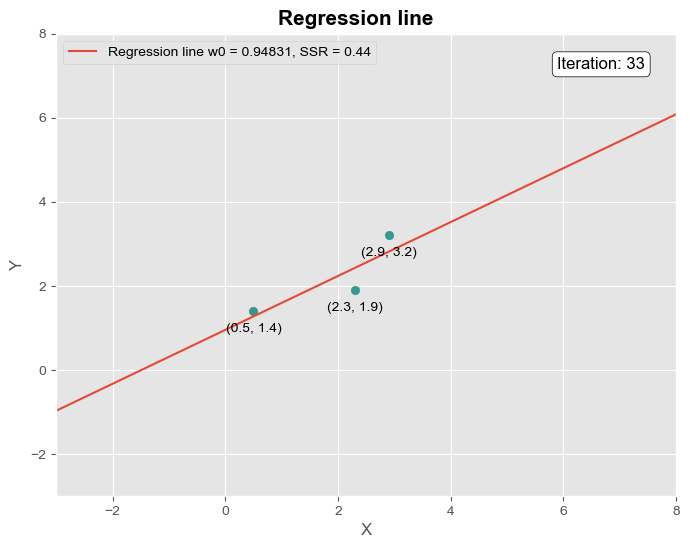

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the data
data = {
    "y": [1.4, 1.9, 3.2],
    "x": [0.5, 2.3, 2.9]
}

df = pd.DataFrame(data)

def regression_line(w0, w1, x):
    return w0 + w1 * x

def ssr(y_true, w0, w1, x1):
    y_pred = w0 + w1 * x1
    residuals = (y_true - y_pred)**2
    return np.sum(residuals)

x1 = df.iloc[:, 1].values
y_true = df.iloc[:, 0].values

# Plotting
plt.rcParams['font.family'] = 'Arial'
plt.style.use('ggplot')

for j, w0 in enumerate(init_w0):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['x'], df['y'], color='#35978f')
    
    # Add annotations to the points
    for i, row in df.iterrows():
        plt.annotate(f'({row["x"]}, {row["y"]})', (row['x'], row['y']), textcoords="offset points", xytext=(0, -15), ha='center')

    x_vals = np.linspace(-3, 8, 400)
    y_vals = regression_line(w0, init_w1[j], x_vals)
    ssr_value = ssr(y_true, w0, init_w1[j], x1)
    plt.plot(x_vals, y_vals, label=f'''Regression line w0 = {w0:.5f}, SSR = {ssr_value:.2f}''')

    plt.suptitle(
        'Regression line',
        color='black',
        fontsize=15,
        fontweight='bold',
        style='normal',
        family='Arial',
        y=0.92
    )
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(-3, 8)
    plt.ylim(-3, 8)
    plt.legend(loc='upper left')

    plt.annotate(f'Iteration: {j+1}', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12,
                 horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

    #plt.savefig(f'media/two_regression_{j}.png', dpi=300)

    plt.show()
